<a href="https://colab.research.google.com/github/melfraas/ML_Stock_Project/blob/main/Clean_Working_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 6.6 MB/s 
     |████████████████████████████████| 9.5 MB 42.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
#import dependencies
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import sklearn as skl
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
# Load the statsmodels api
import statsmodels.api as sm

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [4]:
#read in new csv's
url = 'https://raw.githubusercontent.com/melfraas/ML_Stock_Project/main/min_mean_max.csv'
df1 = pd.read_csv(url)


In [5]:
df1.round(decimals=3)

,Unnamed: 0,Name,CompanyName,year,month,MeanClose,MinClose,MaxClose
0,0,A,Agilent Technologies,2011,1,30.288,29.313,31.724
1,1,A,Agilent Technologies,2011,2,30.709,28.934,32.203
2,2,A,Agilent Technologies,2011,3,31.516,29.099,33.441
3,3,A,Agilent Technologies,2011,4,33.625,32.067,35.994
4,4,A,Agilent Technologies,2011,5,35.959,34.828,37.611
...,...,...,...,...,...,...,...,...
491182,491182,ZYXI,Zynex,2021,4,15.517,14.770,16.360
491183,491183,ZYXI,Zynex,2021,5,14.342,13.480,15.220
491184,491184,ZYXI,Zynex,2021,6,15.710,15.010,16.100
491185,491185,ZYXI,Zynex,2021,7,15.960,13.890,17.220


In [6]:
df1['ym']= pd.to_datetime(df1.year.astype(str) + '/' + df1.month.astype(str))
df1

,Unnamed: 0,Name,CompanyName,year,month,MeanClose,MinClose,MaxClose,ym
0,0,A,Agilent Technologies,2011,1,30.288269,29.313305,31.723890,2011-01-01
1,1,A,Agilent Technologies,2011,2,30.709284,28.934193,32.203148,2011-02-01
2,2,A,Agilent Technologies,2011,3,31.515519,29.098713,33.440628,2011-03-01
3,3,A,Agilent Technologies,2011,4,33.624821,32.067238,35.994278,2011-04-01
4,4,A,Agilent Technologies,2011,5,35.958853,34.828327,37.610874,2011-05-01
...,...,...,...,...,...,...,...,...,...
491182,491182,ZYXI,Zynex,2021,4,15.517143,14.770000,16.360001,2021-04-01
491183,491183,ZYXI,Zynex,2021,5,14.342000,13.480000,15.220000,2021-05-01
491184,491184,ZYXI,Zynex,2021,6,15.710454,15.010000,16.100000,2021-06-01
491185,491185,ZYXI,Zynex,2021,7,15.959524,13.890000,17.219999,2021-07-01


In [7]:
highest_close = df1.nlargest(10, 'MeanClose')
highest_close

,Unnamed: 0,Name,CompanyName,year,month,MeanClose,MinClose,MaxClose,ym
435638,435638,TOPS,Top Ships,2011,1,6.569500e+10,6.111000e+10,6.804000e+10,2011-01-01
435639,435639,TOPS,Top Ships,2011,2,6.203842e+10,5.796000e+10,6.741000e+10,2011-02-01
435640,435640,TOPS,Top Ships,2011,3,5.212565e+10,4.536000e+10,5.796000e+10,2011-03-01
435641,435641,TOPS,Top Ships,2011,4,4.438350e+10,3.969000e+10,4.725000e+10,2011-04-01
435642,435642,TOPS,Top Ships,2011,5,4.161500e+10,3.780000e+10,4.662000e+10,2011-05-01
435643,435643,TOPS,Top Ships,2011,6,2.790000e+10,1.984500e+10,3.906000e+10,2011-06-01
435644,435644,TOPS,Top Ships,2011,7,1.998045e+10,1.568700e+10,2.520000e+10,2011-07-01
435648,435648,TOPS,Top Ships,2011,11,1.532100e+10,1.430100e+10,1.669500e+10,2011-11-01
435652,435652,TOPS,Top Ships,2012,3,1.437259e+10,1.329300e+10,1.612800e+10,2012-03-01
435651,435651,TOPS,Top Ships,2012,2,1.432620e+10,8.568000e+09,2.419200e+10,2012-02-01


In [8]:
#start with one stock and plot monthly trends 
google_df = df1[(df1['Name'] == 'GOOGL')].set_index('ym')
google_df

,Unnamed: 0,Name,CompanyName,year,month,MeanClose,MinClose,MaxClose
ym,,,,,,,,
2011-01-01,191936,GOOGL,Alphabet,2011,1,308.034286,300.480469,320.135132
2011-02-01,191937,GOOGL,Alphabet,2011,2,308.727939,304.714722,315.355347
2011-03-01,191938,GOOGL,Alphabet,2011,3,291.418594,278.828827,305.085083
2011-04-01,191939,GOOGL,Alphabet,2011,4,277.559557,261.026031,296.196198
2011-05-01,191940,GOOGL,Alphabet,2011,5,264.944468,259.324310,271.601593
...,...,...,...,...,...,...,...,...
2021-04-01,192059,GOOGL,Alphabet,2021,4,2272.993803,2129.780029,2392.760010
2021-05-01,192060,GOOGL,Alphabet,2021,5,2308.558008,2200.250000,2380.310059
2021-06-01,192061,GOOGL,Alphabet,2021,6,2420.922718,2347.580078,2450.719971


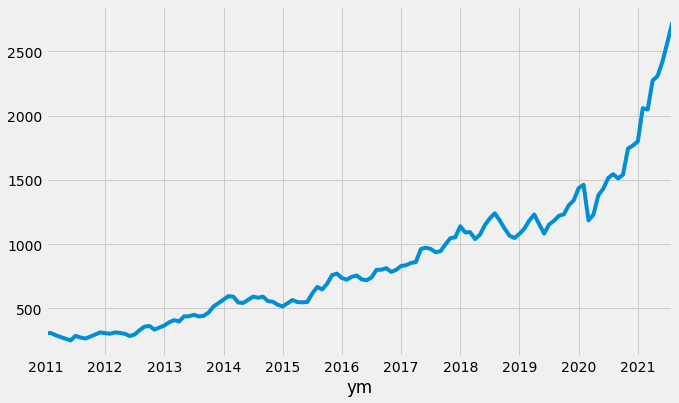

In [9]:
google_df['MeanClose'].plot()

In [10]:
trimmed_df = google_df['MeanClose']
trimmed_df
# trimmed_df.set_index('ym', inplace=True)
# trimmed_df.dtypes

ym
2011-01-01     308.034286
2011-02-01     308.727939
2011-03-01     291.418594
2011-04-01     277.559557
2011-05-01     264.944468
                 ...     
2021-04-01    2272.993803
2021-05-01    2308.558008
2021-06-01    2420.922718
2021-07-01    2571.203323
2021-08-01    2726.600725
Name: MeanClose, Length: 128, dtype: float64

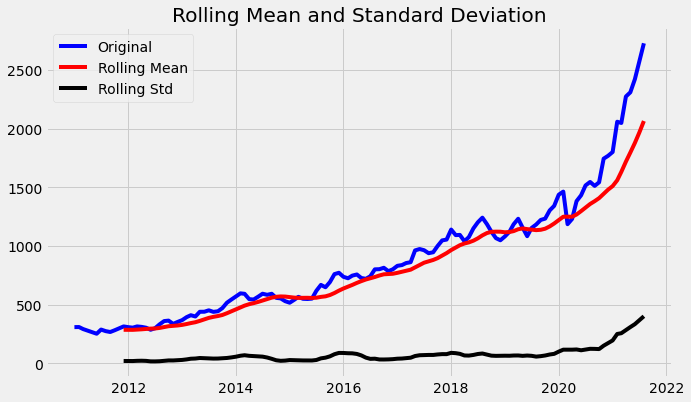

Results of dickey fuller test
Test Statistics                  1.880210
p-value                          0.998496
No. of lags used                11.000000
Number of observations used    116.000000
critical value (1%)             -3.488022
critical value (5%)             -2.886797
critical value (10%)            -2.580241
dtype: float64


In [11]:
from pmdarima.arima import ADFTest
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(trimmed_df)

In [12]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

<Figure size 720x432 with 0 Axes>

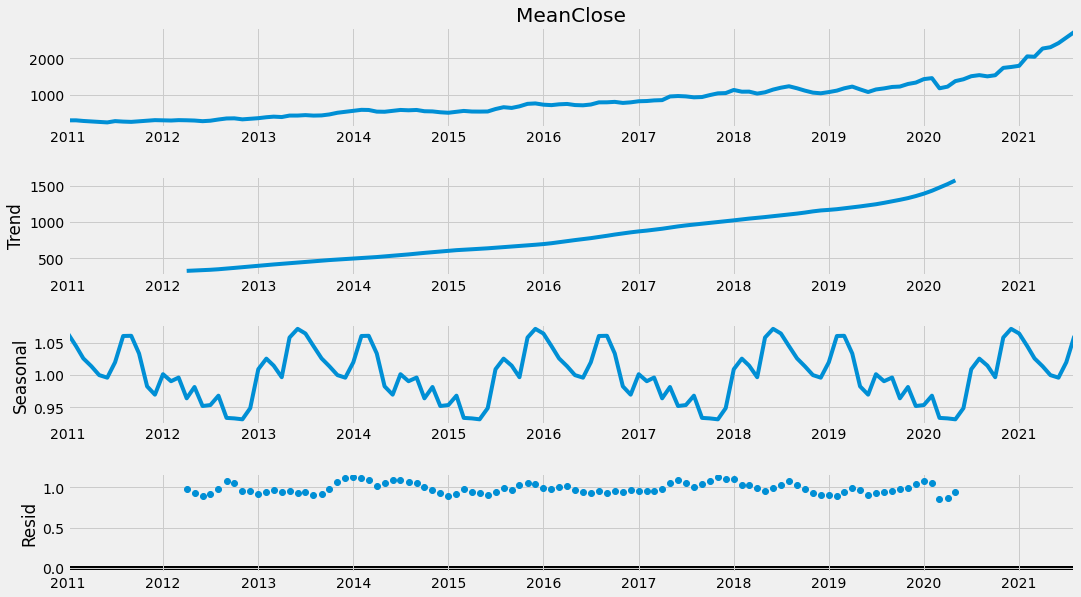

In [13]:
result = seasonal_decompose(trimmed_df, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [14]:
from sklearn.preprocessing import StandardScaler

X = google_df.index
y = google_df['MeanClose']

data = X,y
data
y

ym
2011-01-01     308.034286
2011-02-01     308.727939
2011-03-01     291.418594
2011-04-01     277.559557
2011-05-01     264.944468
                 ...     
2021-04-01    2272.993803
2021-05-01    2308.558008
2021-06-01    2420.922718
2021-07-01    2571.203323
2021-08-01    2726.600725
Name: MeanClose, Length: 128, dtype: float64

In [15]:
# define model configuration
my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 1)
# define model
model = sm.tsa.statespace.SARIMAX(y, trend='c', order=(23,1,0))



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [16]:
data

(DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
                '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
                '2011-09-01', '2011-10-01',
                ...
                '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
                '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
                '2021-07-01', '2021-08-01'],
               dtype='datetime64[ns]', name='ym', length=128, freq=None), ym
 2011-01-01     308.034286
 2011-02-01     308.727939
 2011-03-01     291.418594
 2011-04-01     277.559557
 2011-05-01     264.944468
                  ...     
 2021-04-01    2272.993803
 2021-05-01    2308.558008
 2021-06-01    2420.922718
 2021-07-01    2571.203323
 2021-08-01    2726.600725
 Name: MeanClose, Length: 128, dtype: float64)

In [17]:
#let's fit the model to the training data
model_fit = model.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [23]:
#make a prediction
result = model_fit.predict()
google_df['mean_close_prediction'] = result
google_df


,Unnamed: 0,Name,CompanyName,year,month,MeanClose,MinClose,MaxClose,mean_close_prediction
ym,,,,,,,,,
2011-01-01,191936,GOOGL,Alphabet,2011,1,308.034286,300.480469,320.135132,-7.515940
2011-02-01,191937,GOOGL,Alphabet,2011,2,308.727939,304.714722,315.355347,367.770029
2011-03-01,191938,GOOGL,Alphabet,2011,3,291.418594,278.828827,305.085083,310.395210
2011-04-01,191939,GOOGL,Alphabet,2011,4,277.559557,261.026031,296.196198,283.810654
2011-05-01,191940,GOOGL,Alphabet,2011,5,264.944468,259.324310,271.601593,268.845947
...,...,...,...,...,...,...,...,...,...
2021-04-01,192059,GOOGL,Alphabet,2021,4,2272.993803,2129.780029,2392.760010,2141.615514
2021-05-01,192060,GOOGL,Alphabet,2021,5,2308.558008,2200.250000,2380.310059,2368.745804
2021-06-01,192061,GOOGL,Alphabet,2021,6,2420.922718,2347.580078,2450.719971,2348.286275


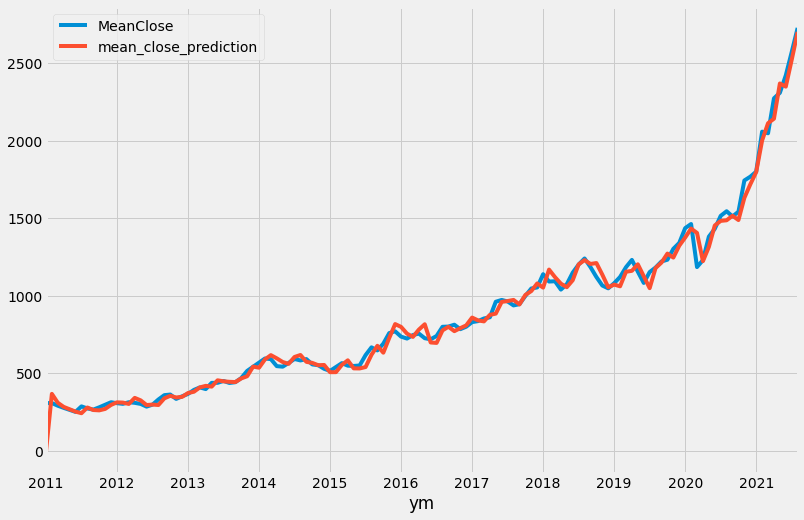

In [19]:
google_df[['MeanClose', 'mean_close_prediction']].plot(figsize=(12,8))

In [24]:
google_df
forecast = model_fit.predict(start = len(google_df), 
                          end = (len(google_df)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')

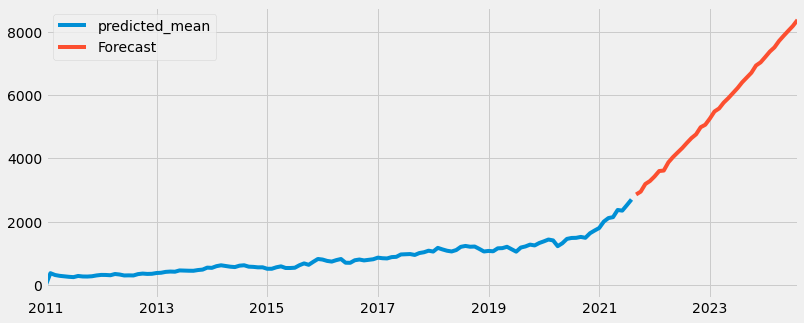

In [25]:
#plot the predictions
result.plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)